# A very simple plot maker

### Read in the file and tree

In [1]:
import uproot

# importing stuff for plotting
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
# read in a file
inFile = uproot.open("../data/en_test_7.root")
inFile.keys()
ldmx_events = inFile["LDMX_Events"]

In [3]:
# show the entire tree's interpretation by uproot
ldmx_events.show()

SimParticles_sim           TStreamerInfo              asdtype('>i4')
SimParticles_sim.fUniqueID TStreamerBasicType         asjagged(asdtype('>u4'))
SimParticles_sim.fBits     TStreamerBasicType         asjagged(asdtype('>u4'))
SimParticles_sim.energy_   TStreamerBasicType         asjagged(asdtype('>f8'))
SimParticles_sim.trackID_  TStreamerBasicType         asjagged(asdtype('>i4'))
SimParticles_sim.pdgID_    TStreamerBasicType         asjagged(asdtype('>i4'))
SimParticles_sim.genStatus_
                           TStreamerBasicType         asjagged(asdtype('>i4'))
SimParticles_sim.time_     TStreamerBasicType         asjagged(asdtype('>f8'))
SimParticles_sim.x_        TStreamerBasicType         asjagged(asdtype('>f8'))
SimParticles_sim.y_        TStreamerBasicType         asjagged(asdtype('>f8'))
SimParticles_sim.z_        TStreamerBasicType         asjagged(asdtype('>f8'))
SimParticles_sim.endX_     TStreamerBasicType         asjagged(asdtype('>f8'))
SimParticles_sim.endY_     TStream

### Make arrays for plotting

In [5]:
a_sim_e     = ldmx_events['SimParticles_sim.energy_'].array().flatten()
a_sim_pdgid = ldmx_events['SimParticles_sim.pdgID_'].array().flatten()
a_sim_trkid = ldmx_events['SimParticles_sim.trackID_'].array().flatten()

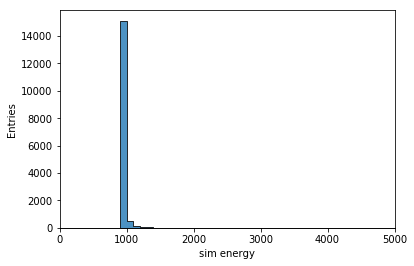

In [14]:
h_sim_e = hist.Hist("Entries",hist.Bin("h_sim_e", r"sim energy", 50, 0, 5000))
cut = (a_sim_pdgid == 2112) # plot only neutron energies
h_sim_e.fill(h_sim_e=a_sim_e[cut])
fig = plot.plot1d(h_sim_e,fill_opts={'alpha': 0.8, 'edgecolor':(0,0,0,0.3)})